In [90]:
import numpy as np
from sklearn.metrics import classification_report, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cross_validation import train_test_split

import pandas as pd
from pickle import load, dump

from keras import metrics
import keras.backend as K
from keras.layers import *
from keras.layers.core import *
from keras.layers.recurrent import *
from keras.layers.merge import *
from keras.layers.convolutional import *
from keras.layers.embeddings import *
from keras.layers.wrappers import *
from keras.layers.normalization import *
from keras.layers.advanced_activations import *
from keras.models import *
from keras.callbacks import *
from keras.utils.vis_utils import *
from keras.utils import *

from IPython.display import SVG
import matplotlib.pyplot as plt

In [91]:
def read_data(path):
    Xs, Ys = pd.read_pickle(path)
    

    Xtrain, Xvalid, Xtest = Xs[:,:5725], Xs[:,5725:5725*2], Xs[:,5725*2:]
    
    Ys = np.concatenate([to_categorical(Ys[rowid])[None,:,:] for rowid in range(len(Ys))])
    Ytrain, Yvalid, Ytest = Ys[:,:5725], Ys[:,5725:5725*2], Ys[:,5725*2:]

    return Xtrain, Xvalid, Xtest, Ytrain, Yvalid, Ytest

In [92]:
num_marks = 5
length_bin = 100
num_filters = 50
length_filter = 10
length_pool = 5
length_full_1 = 625
length_full_2 = 125

In [93]:
Xtrain, Xvalid, Xtest, Ytrain, Yvalid, Ytest = read_data("../data/input.pkl")


In [94]:
print(f"train, X size: {Xtrain.shape}, Y size: {Ytrain.shape}")
print(f"test, X size: {Xvalid.shape}, Y size: {Yvalid.shape}")

train, X size: (2, 5725, 100, 5), Y size: (2, 5725, 2)
test, X size: (2, 5725, 100, 5), Y size: (2, 5725, 2)


# Model definition

In [95]:
%%time 
# channel last
input_shape = (length_bin, num_marks)
input = Input(shape=input_shape)

nn = Conv1D(num_filters, length_filter, padding='same', activation="relu")(input)
nn = BatchNormalization()(nn)
nn = MaxPooling1D(length_pool, strides=length_pool, padding='same')(nn)
nn = Dropout(0.5)(nn)
nn = Conv1D(num_filters, length_filter, padding='same', activation="relu")(nn)
nn = BatchNormalization()(nn)
nn = MaxPooling1D(length_pool, strides=length_pool, padding='same')(nn)
nn = Dropout(0.5)(nn)
nn = Conv1D(num_filters, length_filter, padding='same', activation="relu")(nn)
nn = BatchNormalization()(nn)
nn = MaxPooling1D(length_pool, strides=length_pool, padding='same')(nn)
nn = Dropout(0.5)(nn)
nn = Flatten()(nn)
nn = Dense(length_full_1, activation="relu")(nn)
nn = Dense(length_full_2, activation="relu")(nn)
nn = Dense(2, activation="softmax")(nn)


clf = Model(inputs=input, outputs=nn)
clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

CPU times: user 464 ms, sys: 0 ns, total: 464 ms
Wall time: 465 ms


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 100, 5)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 100, 50)           2550      
_________________________________________________________________
batch_normalization_7 (Batch (None, 100, 50)           200       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 20, 50)            0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 20, 50)            25050     
_________________________________________________________________
batch_normalization_8 (Batch (None, 20, 50)            200       
__________

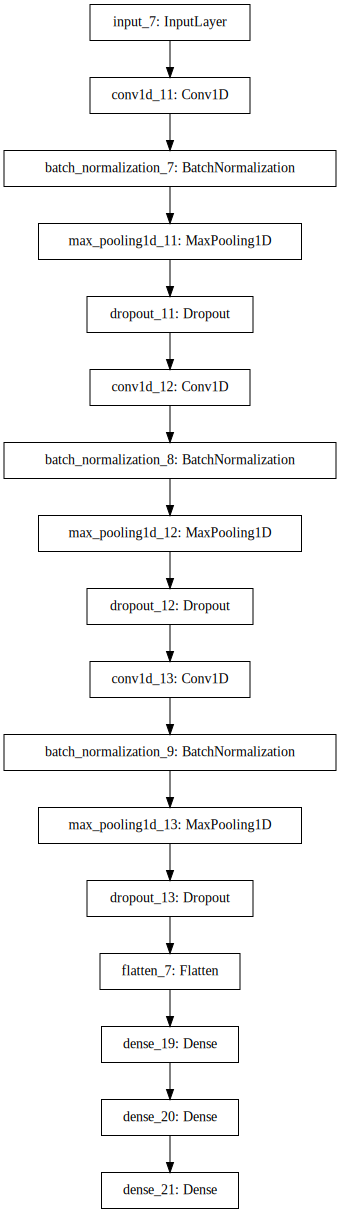

In [96]:
clf.summary()
SVG(model_to_dot(clf).create(prog='dot', format='svg'))

In [98]:
run_name = "deepchrome real new E013 2"
tb = TensorBoard(log_dir=f"../log/{run_name}", batch_size=32, write_graph=True)
checkpointer = ModelCheckpoint(filepath=f"../model/{run_name}.h5", verbose=1, save_best_only=True, monitor="val_acc")
stopper = EarlyStopping(monitor="val_acc", patience=3)

In [99]:
epigenome = 0
clf.fit(
    Xtrain[epigenome],
    Ytrain[epigenome],
    batch_size=2000,
    callbacks = [tb, checkpointer],
    epochs=1000,
    shuffle=True,
    validation_data=(Xvalid[epigenome], Yvalid[epigenome]),
    verbose=0)

Epoch 00000: val_acc improved from -inf to 0.57659, saving model to ../model/deepchrome real new E013 2.h5
Epoch 00001: val_acc did not improve
Epoch 00002: val_acc improved from 0.57659 to 0.61380, saving model to ../model/deepchrome real new E013 2.h5
Epoch 00003: val_acc improved from 0.61380 to 0.71878, saving model to ../model/deepchrome real new E013 2.h5
Epoch 00004: val_acc improved from 0.71878 to 0.74463, saving model to ../model/deepchrome real new E013 2.h5
Epoch 00005: val_acc improved from 0.74463 to 0.74725, saving model to ../model/deepchrome real new E013 2.h5
Epoch 00006: val_acc improved from 0.74725 to 0.74882, saving model to ../model/deepchrome real new E013 2.h5
Epoch 00007: val_acc improved from 0.74882 to 0.75511, saving model to ../model/deepchrome real new E013 2.h5
Epoch 00008: val_acc improved from 0.75511 to 0.75983, saving model to ../model/deepchrome real new E013 2.h5
Epoch 00009: val_acc improved from 0.75983 to 0.76594, saving model to ../model/deepch

KeyboardInterrupt: 